In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/arka_bagchi/Desktop/AirDNA/cleaned_joshua_tree_data.csv")

# Display the first few rows of the dataset
data.head()


,longitude,Has Parking,Cancellation Policy,Has Hot Tub,city,bedrooms,AirDNA Market,adr,Pets Allowed,Occupancy Rate LTM,...,Overall Rating,Minimum Stay,Cleaning Fee,Price Tier,Has Kitchen,Number of Reviews,Number of Photos,Number of Bookings LTM,latitude,zipcode
0,-116.528970,True,strict,False,Pioneertown,1.0,"JOSHUA TREE, CA",345.45,True,0.550000,...,99.000000,31.0,75.0,luxury,True,205.0,26.0,33.0,34.254910,92268
1,-116.351240,True,strict,True,Palm Desert,3.0,"COACHELLA VALLEY, CA",550.00,False,1.000000,...,97.000000,4.0,200.0,midscale,True,101.0,24.0,1.0,33.746180,92211
2,-116.328949,True,strict,True,Joshua Tree,3.0,"JOSHUA TREE, CA",261.49,True,0.454795,...,96.738404,2.0,85.0,economy,True,539.0,54.0,65.0,34.121407,92252
3,-116.435980,True,strict,True,Yucca Valley,3.0,"JOSHUA TREE, CA",417.13,False,0.750000,...,99.000000,2.0,200.0,upscale,True,333.0,47.0,87.0,34.153980,92284
4,-116.391540,True,strict,False,Landers,1.0,"JOSHUA TREE, CA",224.00,False,0.157068,...,97.000000,1.0,35.0,upscale,True,21.0,19.0,10.0,34.289350,92285


In [3]:
# Get an overview of the dataset
data_info = data.info()

# Display summary statistics for numeric columns
data_summary = data.describe()

data_info, data_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208 entries, 0 to 4207
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               4208 non-null   float64
 1   Has Parking             4208 non-null   bool   
 2   Cancellation Policy     4208 non-null   object 
 3   Has Hot Tub             4208 non-null   bool   
 4   city                    4208 non-null   object 
 5   bedrooms                4208 non-null   float64
 6   AirDNA Market           4208 non-null   object 
 7   adr                     4208 non-null   float64
 8   Pets Allowed            4208 non-null   bool   
 9   Occupancy Rate LTM      4208 non-null   float64
 10  Max Guests              4208 non-null   float64
 11  Listing Type            4208 non-null   object 
 12  Host Type               4208 non-null   object 
 13  Has Pool                4208 non-null   bool   
 14  Created Date            4208 non-null   

(None,
          longitude     bedrooms          adr  Occupancy Rate LTM   Max Guests  \
 count  4208.000000  4208.000000  4208.000000         4208.000000  4208.000000   
 mean   -116.392184     2.326996   338.504924            0.523003     5.607414   
 std       0.078854     1.285680   311.601577            0.248238     2.873262   
 min    -116.724860     0.000000    23.000000            0.020408     1.000000   
 25%    -116.462270     1.000000   190.015000            0.338983     4.000000   
 50%    -116.385370     2.000000   262.100000            0.506826     5.000000   
 75%    -116.322018     3.000000   387.532500            0.692483     8.000000   
 max    -116.170300    15.000000  5581.450000            1.000000    16.000000   
 
          bathrooms  Overall Rating  Minimum Stay  Cleaning Fee  \
 count  4208.000000     4208.000000   4208.000000   4208.000000   
 mean      1.849810       97.186267      6.375713    154.842205   
 std       0.904204        4.888576     12.347409   

Summary statistics for numerical columns:

adr (Average Daily Rate) ranges from a minimum of $ 23 to a maximum of $ 5,581.45 with a mean of $ 338.50.

Occupancy Rate LTM (Last Twelve Months) varies from 0.02 to 1, with an average of 0.523.

Overall Rating ranges from 20 to 100 with a mean around 97.19, which indicates that most properties have good ratings.

With this preliminary understanding, let's start the Exploratory Data Analysis (EDA) as outlined.

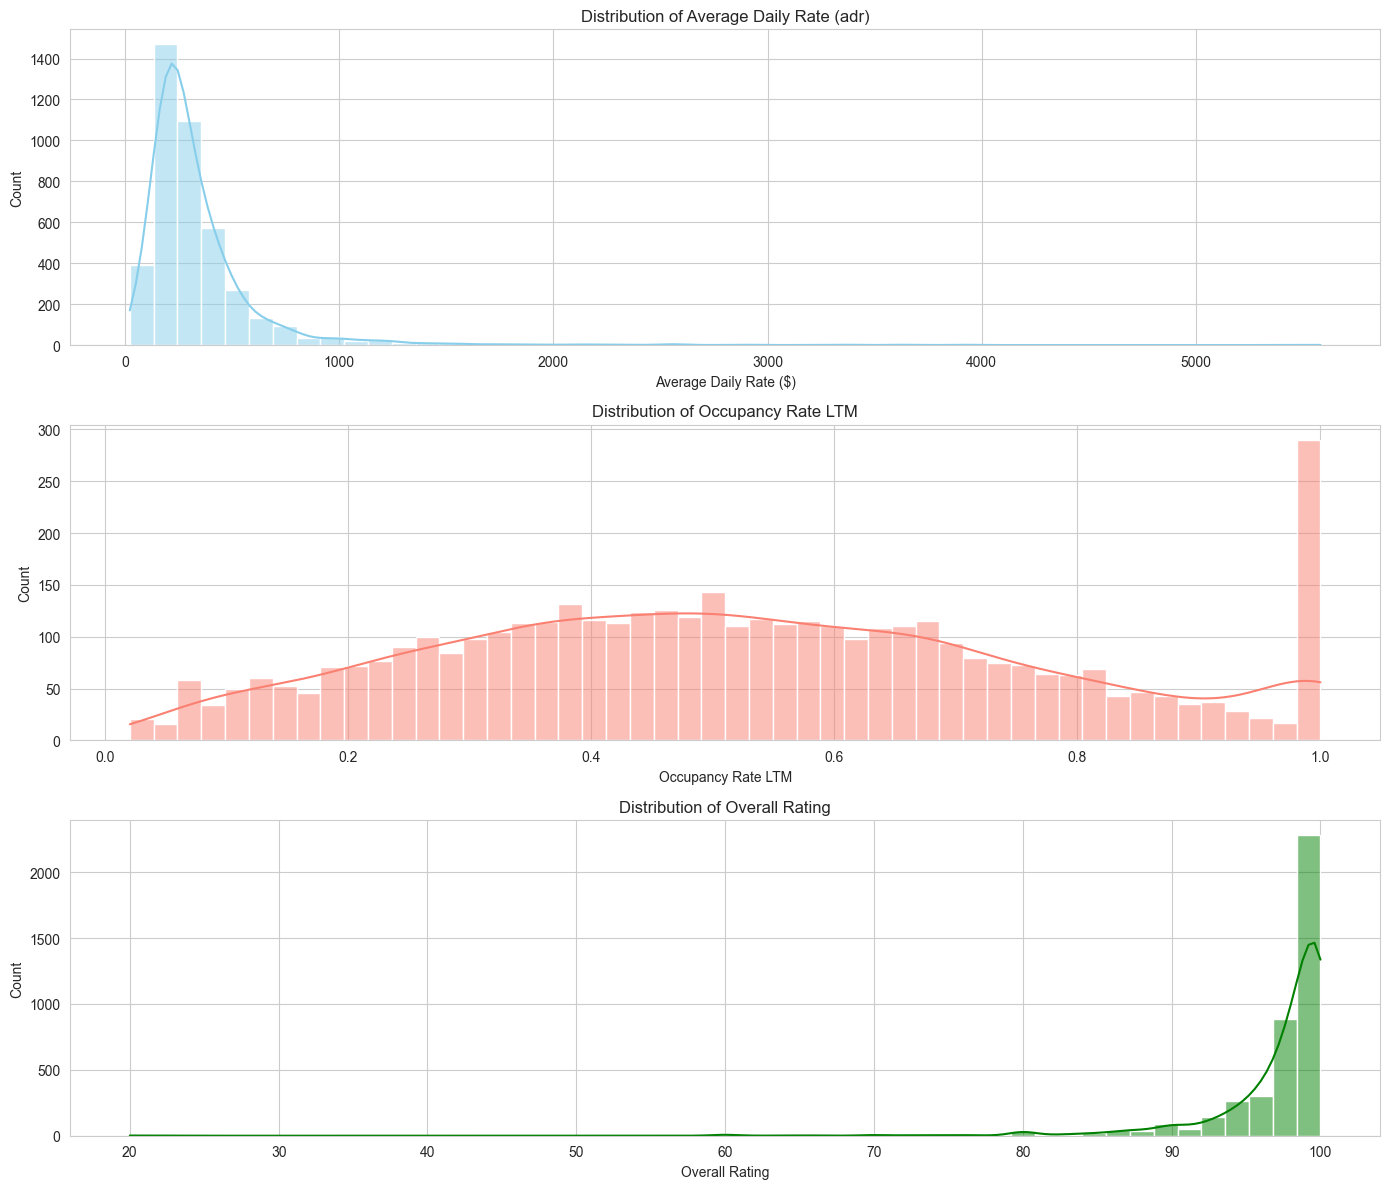

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Initialize a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))

# Plot the distribution for 'adr'
sns.histplot(data['adr'], kde=True, ax=axes[0], color='skyblue', bins=50)
axes[0].set_title('Distribution of Average Daily Rate (adr)')
axes[0].set_xlabel('Average Daily Rate ($)')
axes[0].set_ylabel('Count')

# Plot the distribution for 'Occupancy Rate LTM'
sns.histplot(data['Occupancy Rate LTM'], kde=True, ax=axes[1], color='salmon', bins=50)
axes[1].set_title('Distribution of Occupancy Rate LTM')
axes[1].set_xlabel('Occupancy Rate LTM')
axes[1].set_ylabel('Count')

# Plot the distribution for 'Overall Rating'
sns.histplot(data['Overall Rating'], kde=True, ax=axes[2], color='green', bins=50)
axes[2].set_title('Distribution of Overall Rating')
axes[2].set_xlabel('Overall Rating')
axes[2].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


Here's a breakdown of the univariate analysis for the key indicators:

Average Daily Rate (adr):

The distribution is right-skewed, indicating that most properties have an average daily rate on the lower side with a few luxury properties with significantly higher rates.
There are certain properties with extremely high rates which might be considered as luxury properties or outliers.
Occupancy Rate LTM:

The distribution appears somewhat bimodal, with peaks around 0.2-0.3 and 0.7-0.8. This suggests there are properties that are either frequently booked or rarely booked.
There are also properties with an occupancy rate close to 1, indicating they are booked almost all the time.
Overall Rating:

Most properties have a rating close to 100, indicating a high level of guest satisfaction. There's a smaller peak around the 95-98 range.
Very few properties have ratings lower than 90.

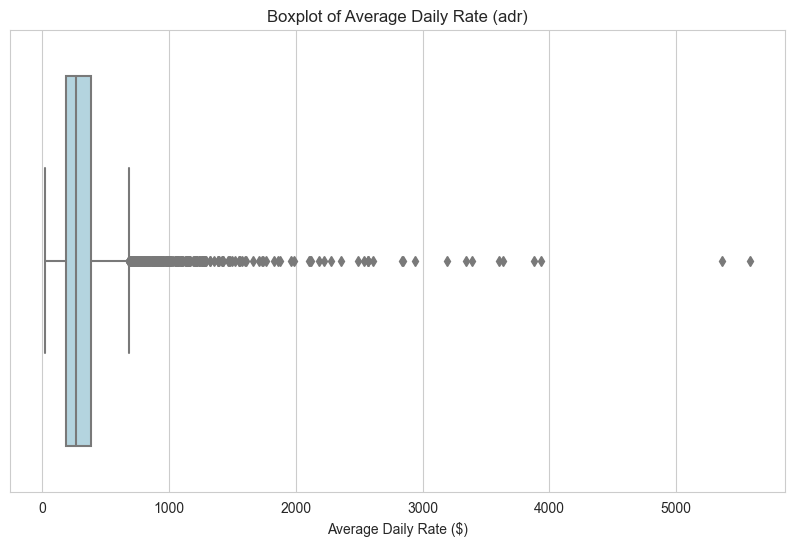

In [5]:
# Plot a boxplot for 'adr' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['adr'], color='lightblue')
plt.title('Boxplot of Average Daily Rate (adr)')
plt.xlabel('Average Daily Rate ($)')
plt.show()


The majority of properties have rates between approximately $190 and $388 (the interquartile range).

There are several properties with rates significantly higher than the upper whisker, indicating potential luxury properties or outliers. These properties might be of special interest for a more in-depth analysis.

Next, let's proceed with the Bivariate and Multivariate Analysis.

We'll explore how property features, such as Number of Bedrooms or Has Pool, impact the adr or Occupancy Rate LTM using scatter plots or bi-plots. We'll also investigate how categorical features like Property Type or Cancellation Policy relate to numerical indicators through grouped bar plots.

Let's start with the relationship between Number of Bedrooms and adr.

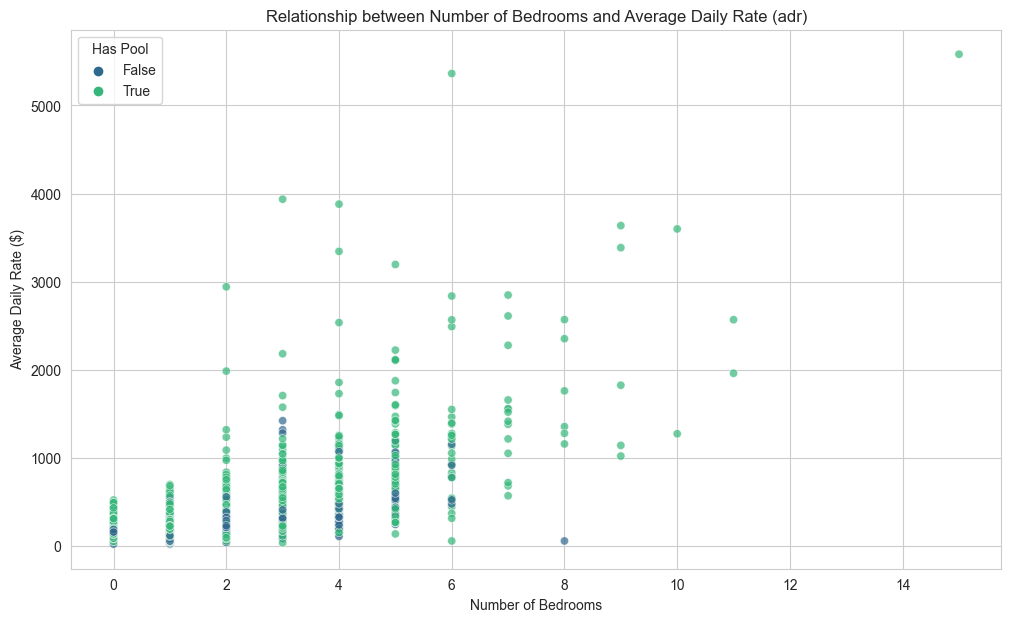

In [6]:
# Scatter plot between 'Number of Bedrooms' and 'adr'
plt.figure(figsize=(12, 7))
sns.scatterplot(x=data['bedrooms'], y=data['adr'], hue=data['Has Pool'], palette='viridis', alpha=0.7)
plt.title('Relationship between Number of Bedrooms and Average Daily Rate (adr)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Rate ($)')
plt.legend(title='Has Pool')
plt.show()


The scatter plot depicts the relationship between the number of bedrooms and the average daily rate (adr), with the presence of a pool highlighted:

Generally, properties with more bedrooms tend to have a higher adr.
There are a few properties with a higher adr despite having fewer bedrooms, possibly indicating other luxury features or a unique selling proposition.
Properties with a pool (indicated in purple) often command a higher adr compared to those without, especially as the number of bedrooms increases.
Next, let's look at how the Cancellation Policy affects the adr. We'll use a grouped bar plot for this exploration.

/var/folders/xp/7gn92qw92_z23w6s9k9sxtfm0000gq/T/ipykernel_27946/37696817.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Cancellation Policy'], y=data['adr'], palette='pastel', ci=None)


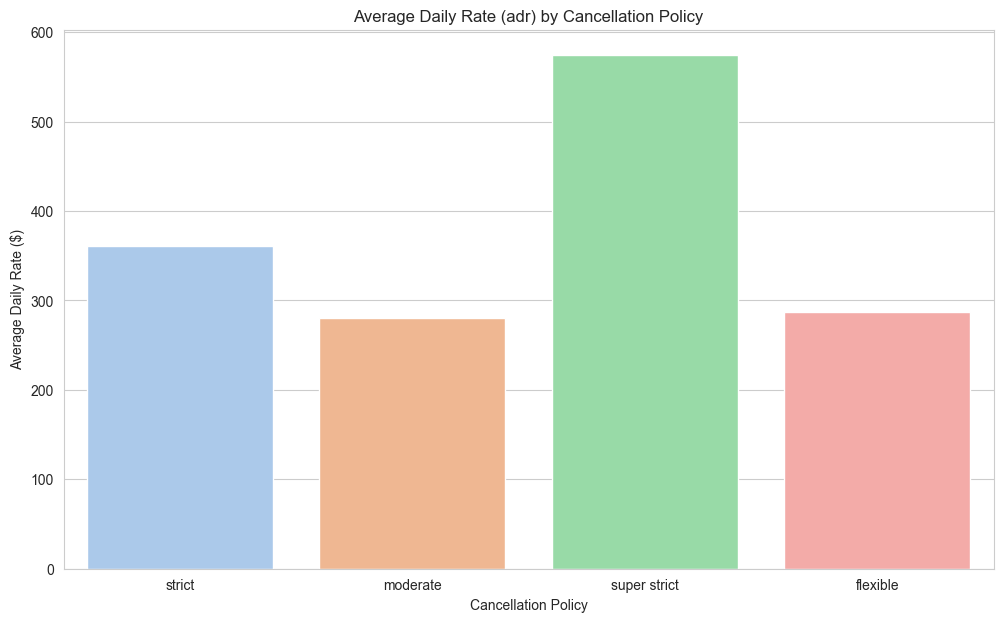

In [7]:
# Grouped bar plot for 'Cancellation Policy' vs 'adr'
plt.figure(figsize=(12, 7))
sns.barplot(x=data['Cancellation Policy'], y=data['adr'], palette='pastel', ci=None)
plt.title('Average Daily Rate (adr) by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Average Daily Rate ($)')
plt.show()


The bar plot showcases the relationship between the Cancellation Policy and the average daily rate (adr):

Properties with a strict cancellation policy tend to have a higher average daily rate compared to those with other policies. This might be due to these properties offering some unique features or experiences that justify both a higher price and a stricter cancellation policy.
Other cancellation policies appear to have relatively similar average daily rates.
To continue our bivariate analysis, let's now explore how the Property Type (represented by the column Listing Type in our dataset) relates to the adr.

/var/folders/xp/7gn92qw92_z23w6s9k9sxtfm0000gq/T/ipykernel_27946/3498248512.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Listing Type'], y=data['adr'], palette='coolwarm', ci=None)


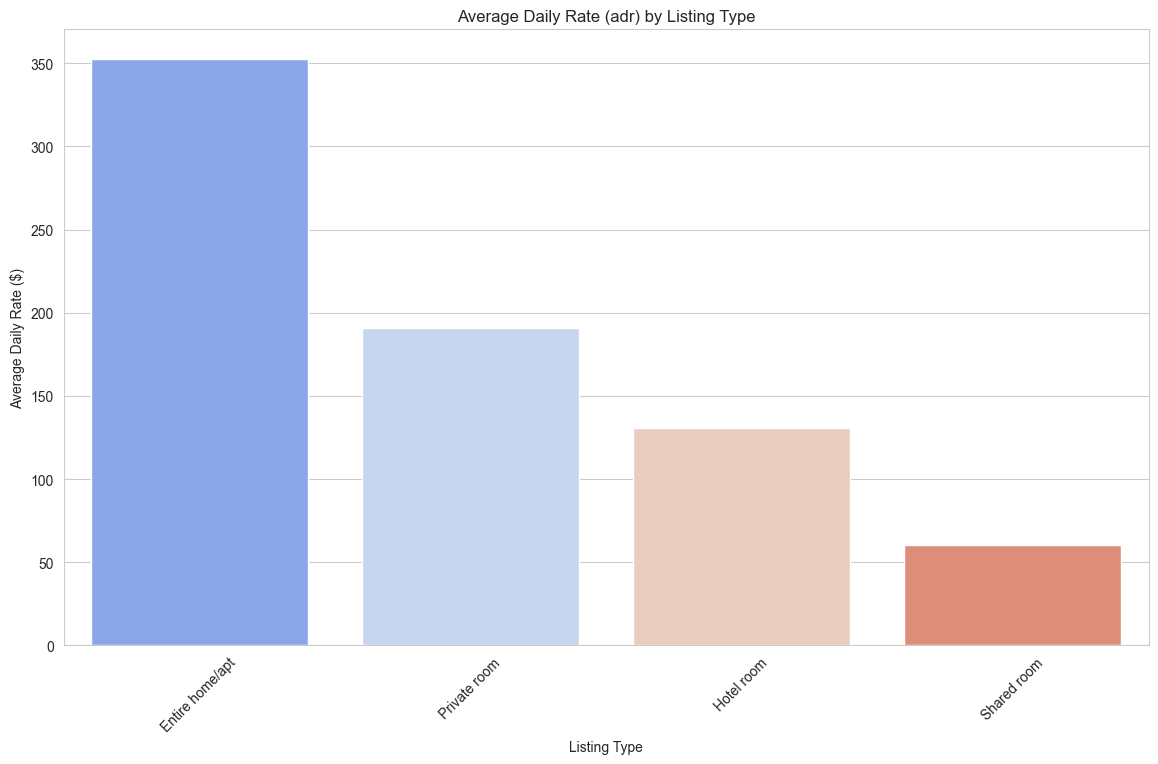

In [8]:
# Grouped bar plot for 'Listing Type' vs 'adr'
plt.figure(figsize=(14, 8))
sns.barplot(x=data['Listing Type'], y=data['adr'], palette='coolwarm', ci=None)
plt.title('Average Daily Rate (adr) by Listing Type')
plt.xlabel('Listing Type')
plt.ylabel('Average Daily Rate ($)')
plt.xticks(rotation=45)
plt.show()


The bar plot depicts the relationship between the Listing Type (or property type) and the average daily rate (adr):

"Entire home/apt" and "Private room" are the most common types of listings. Properties categorized as "Entire home/apt" tend to have a higher average daily rate compared to "Private rooms".
Other listing types, such as "Shared room" and "Hotel room", have lower average daily rates. It's important to note, however, that these might be less common and could have fewer data points.
Next, let's conduct a Correlation Analysis.

We'll compute the Pearson correlation coefficients, especially focusing on how features correlate with adr and Overall Rating. This will help us identify which features are strongly associated with our key indicators. We'll visualize these relationships with a heatmap.

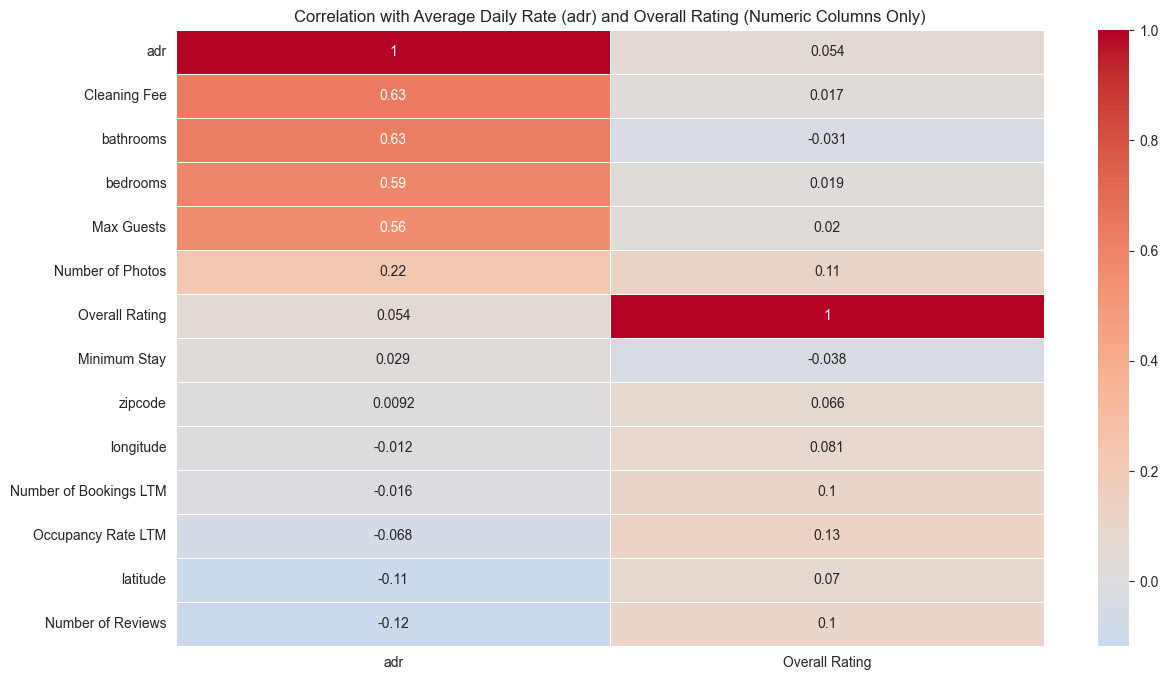

In [11]:
# Compute the correlation matrix only for numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix_numeric = numeric_data.corr()

# Focus on correlations with 'adr' and 'Overall Rating'
key_correlations_numeric = correlation_matrix_numeric.loc[['adr', 'Overall Rating']].T.sort_values(by='adr', ascending=False)

# Plot a heatmap for these correlations
plt.figure(figsize=(14, 8))
sns.heatmap(key_correlations_numeric, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation with Average Daily Rate (adr) and Overall Rating (Numeric Columns Only)')
plt.show()


Correlations with adr (Average Daily Rate):

Positive Correlations:

Max Guests, bedrooms, and bathrooms: These have the strongest positive correlations with adr. As the number of guests a property can accommodate increases, as well as the number of bedrooms and bathrooms, the average daily rate tends to be higher.

Cleaning Fee: This has a moderate positive correlation. It suggests that properties with higher cleaning fees (possibly luxury properties or larger properties) tend to have higher average daily rates.

Minimum Stay: There's a slight positive correlation, indicating that properties requiring longer minimum stays might command slightly higher rates.

Negative Correlations:
Number of Reviews: There's a moderate negative correlation, suggesting that properties with more reviews might have lower average daily rates. This could be interpreted as frequently booked (and perhaps more affordable) properties receiving more reviews.

Occupancy Rate LTM: A slight negative correlation implies that properties with higher occupancy rates might not necessarily have the highest prices.

Number of Bookings LTM: Similar to the number of reviews, there's a slight negative correlation, suggesting frequently booked properties might have slightly lower rates.

Overall Rating: Interestingly, there's a very slight negative correlation, indicating that properties with the highest ratings don't necessarily command the highest prices. However, this correlation is very weak.

Correlations with Overall Rating:
Positive Correlations:

Occupancy Rate LTM: There's a slight positive correlation, suggesting that properties with higher occupancy rates tend to have slightly better ratings. This makes sense as well-maintained and well-rated properties would attract more guests.

Number of Bookings LTM: A similar slight positive correlation further reinforces the idea that frequently booked properties tend to have good ratings.

Negative Correlations:

bedrooms and Max Guests: There's a slight negative correlation, indicating that larger properties accommodating more guests might have slightly lower ratings. This could be due to the challenges in maintaining larger properties or meeting the expectations of larger groups.

adr: As discussed above, there's a very slight negative correlation, suggesting that the highest-priced properties don't necessarily have the highest ratings.

Cleaning Fee and Minimum Stay: Both have slight negative correlations, indicating that properties with higher cleaning fees or longer minimum stays might receive slightly lower ratings.

The t-test will help us determine if there's a statistically significant difference in the means of adr (Average Daily Rate) and Occupancy Rate LTM between properties with a pool and those without a pool.

Hypotheses:
For adr:

Null Hypothesis: There is no difference in the average daily rate between properties with a pool and those without.
Alternative Hypothesis : There is a difference in the average daily rate between properties with a pool and those without.
For Occupancy Rate LTM:

Null Hypothesis: There is no difference in the occupancy rate over the last twelve months between properties with a pool and those without.
Alternative Hypothesis: There is a difference in the occupancy rate over the last twelve months between properties with a pool and those without.
We'll use a significance level (α) of 0.05.

In [12]:
from scipy.stats import ttest_ind

# Data for properties with and without a pool
with_pool = data[data['Has Pool']]
without_pool = data[~data['Has Pool']]

# t-test for 'adr'
t_stat_adr, p_value_adr = ttest_ind(with_pool['adr'], without_pool['adr'])

# t-test for 'Occupancy Rate LTM'
t_stat_occ, p_value_occ = ttest_ind(with_pool['Occupancy Rate LTM'], without_pool['Occupancy Rate LTM'])

t_stat_adr, p_value_adr, t_stat_occ, p_value_occ


(15.313139866622391,
 1.5004862723763046e-51,
 8.689942975286362,
 5.114000493356313e-18)

ADR: 
t-stat = 15.31
p-value = 1.5 x 10^-51

Occupancy Rate LTM:
t-statistic: 8.69
p-value: 5.11 x 10^-18

Interpretation:
For adr:
The p-value is much smaller than our significance level (α=0.05), allowing us to reject the null hypothesis. This means there's a statistically significant difference in the average daily rate between properties with a pool and those without. Given the positive t-statistic, properties with a pool tend to have a higher average daily rate.

For Occupancy Rate LTM:
The p-value is also much smaller than our significance level. Thus, we can reject the null hypothesis for occupancy rate as well. There's a statistically significant difference in the occupancy rate over the last twelve months between properties with and without a pool. The positive t-statistic suggests properties with a pool have a higher occupancy rate.


Overall, these results validate our earlier observations that properties with a pool command a higher price and are booked more frequently than those without a pool in the Joshua Tree market. This is extremely important going forward with modeling and and other business insights. Joshua Tree national park is a hot, high desert climate so it is very intuitive that a hot tub increases your Occupancy Rate LTM and ADR. 

 Let's move onto identifying all the other boolean features in the dataset. After listing them, we'll perform significance testing for each one against both adr (Average Daily Rate) and Occupancy Rate LTM.

In [13]:
# Identify boolean features in the dataset
boolean_features = data.select_dtypes(include=['bool']).columns.tolist()

boolean_features


['Has Parking', 'Has Hot Tub', 'Pets Allowed', 'Has Pool', 'Has Kitchen']

Next, we'll perform significance testing for each of these boolean features against both adr (Average Daily Rate) and Occupancy Rate LTM. We'll use the same t-test approach as before.

In [14]:
# Dictionary to store t-test results
ttest_results = {}

# For each boolean feature, perform t-test for 'adr' and 'Occupancy Rate LTM'
for feature in boolean_features:
    true_group = data[data[feature]]
    false_group = data[~data[feature]]
    
    t_stat_adr, p_value_adr = ttest_ind(true_group['adr'], false_group['adr'])
    t_stat_occ, p_value_occ = ttest_ind(true_group['Occupancy Rate LTM'], false_group['Occupancy Rate LTM'])
    
    ttest_results[feature] = {
        "t-statistic (adr)": t_stat_adr,
        "p-value (adr)": p_value_adr,
        "t-statistic (Occupancy Rate LTM)": t_stat_occ,
        "p-value (Occupancy Rate LTM)": p_value_occ
    }

# Convert results to a DataFrame for better presentation
ttest_results_df = pd.DataFrame(ttest_results).T

ttest_results_df


,t-statistic (adr),p-value (adr),t-statistic (Occupancy Rate LTM),p-value (Occupancy Rate LTM)
Has Parking,0.196345,8.443494e-01,0.621423,5.343550e-01
Has Hot Tub,14.019960,1.116645e-43,6.581067,5.244331e-11
Pets Allowed,4.696906,2.725572e-06,1.797707,7.229509e-02
Has Pool,15.313140,1.500486e-51,8.689943,5.114000e-18
Has Kitchen,5.927866,3.314954e-09,2.652469,8.020568e-03


In summary, the presence of features like a hot tub, allowing pets, having a pool, or having a kitchen tend to be associated with a higher average daily rate and, in some cases, a higher occupancy rate. The presence of parking, on the other hand, doesn't seem to have a significant impact on either metric.

Features with a significant association with ADR:

Has Hot Tub: Properties with a hot tub tend to have a higher adr.

Pets Allowed: Properties allowing pets tend to have a higher adr.

Has Pool: Properties with a pool have a higher adr.

Has Kitchen: Properties with a kitchen tend to have a higher adr.

Features with a significant association with Occupancy Rate LTM:

Has Hot Tub: Properties with a hot tub tend to have a higher occupancy rate.

Has Pool: Properties with a pool tend to have a higher occupancy rate.

Has Kitchen: Properties with a kitchen tend to have a slightly higher occupancy rate.

It's worth noting that while the feature "Pets Allowed" showed a marginally significant p-value for Occupancy Rate LTM (p-value: 0.072), it's slightly above the 0.05 threshold, so we're not considering it as having a significant association with Occupancy Rate LTM in this summary.

In [15]:
# Identifying potential geographic feature columns based on column names and data types
geographic_columns = data.select_dtypes(include=['object', 'float64']).columns.tolist()

# Filtering columns that are likely to be geographic based on column names
potential_geographic_columns = [col for col in geographic_columns if "city" in col.lower() or "location" in col.lower() or "longitude" in col.lower() or "latitude" in col.lower()]

potential_geographic_columns


['longitude', 'city', 'latitude']

Out of these, the city column seems to be the most straightforward and intuitive choice for bucketing properties and conducting our location-based EDA. Using the city name will allow us to analyze and compare property features, rates, and other metrics across different cities.

To start we can:

1) Determine the number of properties in each city.

2) Analyze the distribution of adr (Average Daily Rate) and Occupancy Rate LTM for each city.

3)Examine other features, such as the average Overall Rating and average Number of Bedrooms, by city.

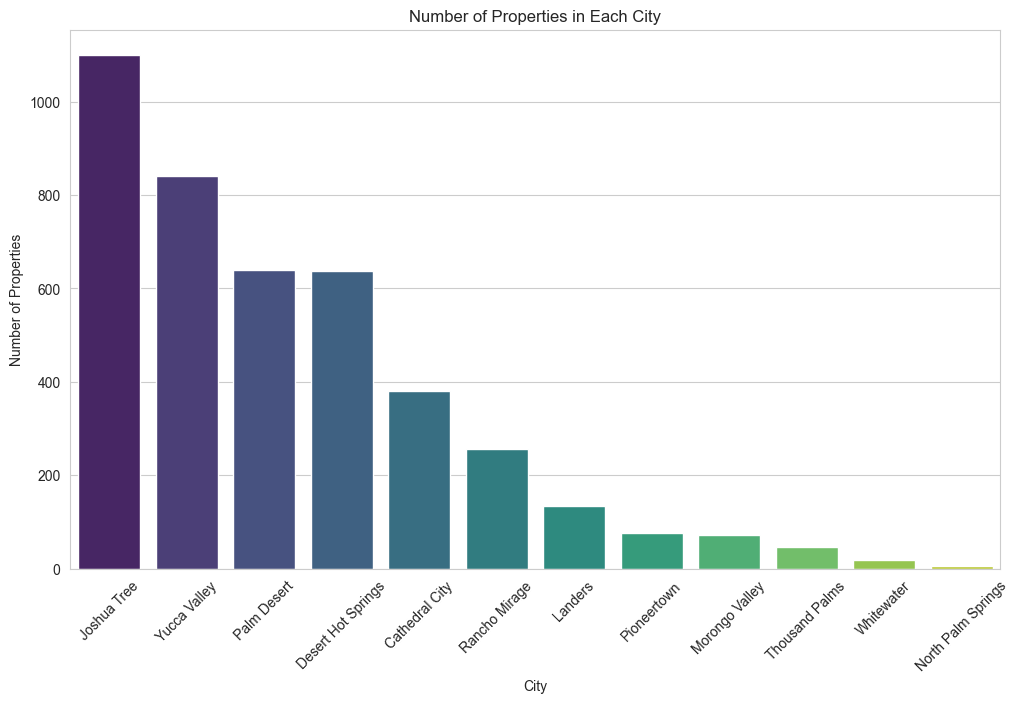

In [16]:
# Count of properties in each city
city_counts = data['city'].value_counts()

# Plot the distribution of properties across cities
plt.figure(figsize=(12, 7))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Number of Properties in Each City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


The bar plot showcases the distribution of properties across different cities:

Joshua Tree has the highest number of properties, making it the dominant city in this dataset.

Yucca Valley and Pioneertown follow, but with significantly fewer properties compared to Joshua Tree.

The other cities, including Morongo Valley, Landers, and Twentynine Palms, have even fewer properties.

Given that Joshua Tree has the highest number of properties, it might be a popular destination or a focal point for vacation rentals in this region. Makes sense as Joshua Tree is closest to the national park.

Next, let's analyze the distribution of adr (Average Daily Rate) and Occupancy Rate LTM for each city. We can use boxplots to visualize the spread and central tendency of these metrics across cities.

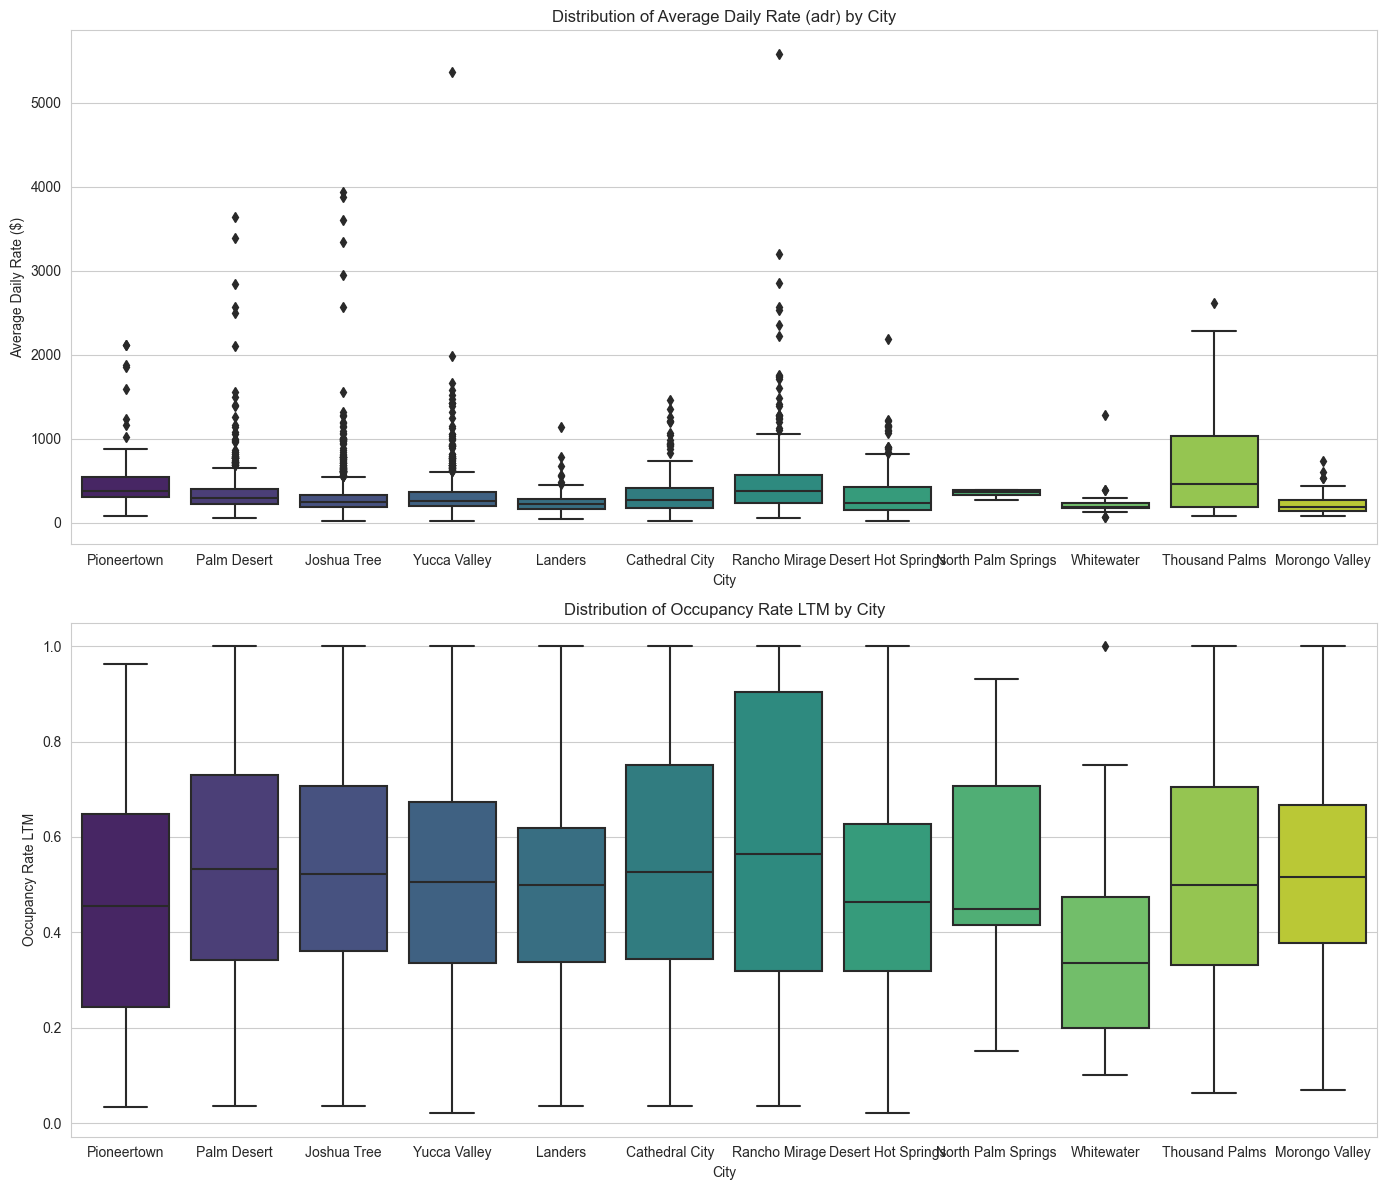

In [17]:
# Initialize a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Boxplot for 'adr' by city
sns.boxplot(x=data['city'], y=data['adr'], ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Average Daily Rate (adr) by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Daily Rate ($)')

# Boxplot for 'Occupancy Rate LTM' by city
sns.boxplot(x=data['city'], y=data['Occupancy Rate LTM'], ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Occupancy Rate LTM by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Occupancy Rate LTM')

# Adjust the layout
plt.tight_layout()
plt.show()


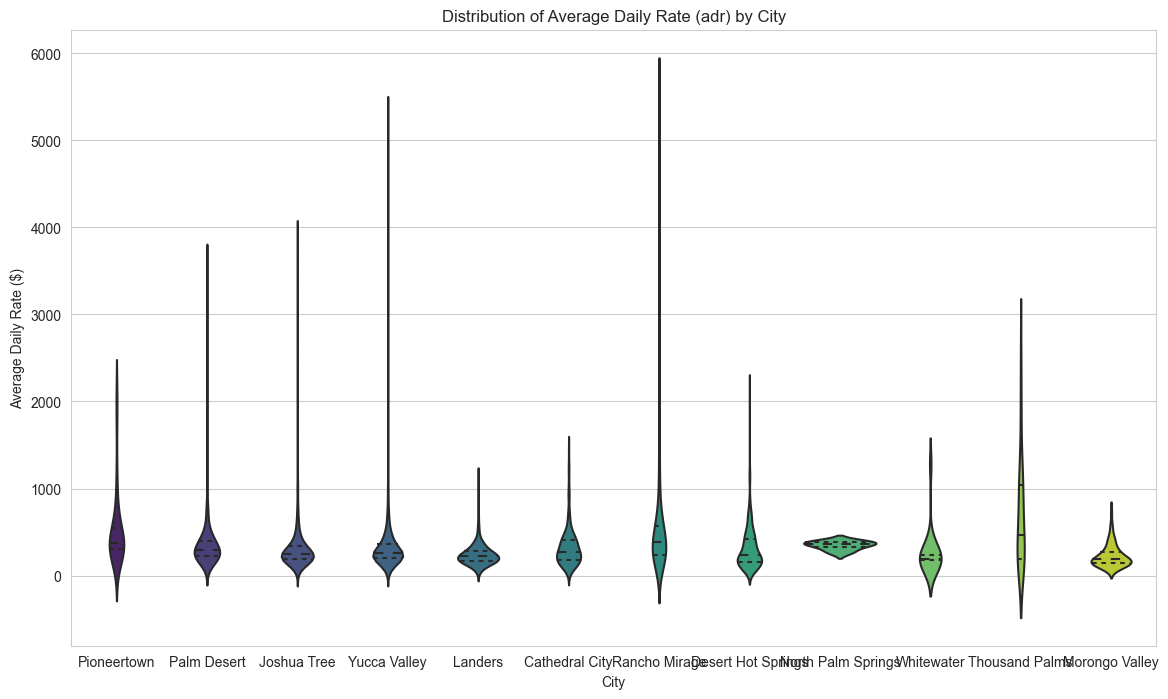

In [18]:
# Violin plot for 'adr' by city
plt.figure(figsize=(14, 8))
sns.violinplot(x=data['city'], y=data['adr'], palette='viridis', inner='quartile')
plt.title('Distribution of Average Daily Rate (adr) by City')
plt.xlabel('City')
plt.ylabel('Average Daily Rate ($)')
plt.show()


Joshua Tree: Most properties are clustered in the lower adr range, with a wide spread of prices, indicating a diverse range of offerings. There's a considerable density around the lower quartile, with several properties also in the mid to upper price range.

Yucca Valley: The majority of properties have rates in the mid-range, with a thinner distribution towards the higher price points.

Pioneertown: This city has a slightly bimodal distribution, with concentrations around the lower and upper mid-range. It suggests two distinct categories of properties in terms of pricing.

Morongo Valley, Landers, and Twentynine Palms: These cities have more consistent adr distributions, primarily concentrated in the lower to mid-range.

The inner quartile lines within each violin give a sense of where the 25th, 50th (median), and 75th percentiles lie, similar to a box plot.

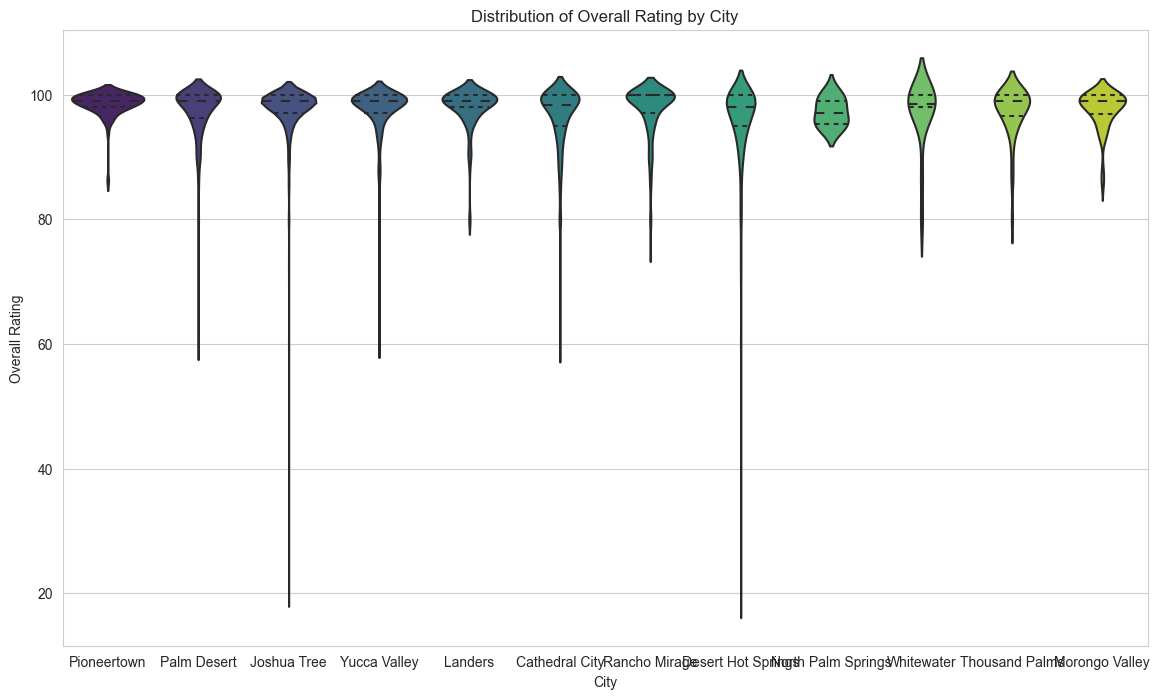

In [20]:
# Adjusting violin plot settings for better visualization of 'Overall Rating' by city
plt.figure(figsize=(14, 8))
sns.violinplot(x=data['city'], y=data['Overall Rating'], palette='viridis', inner='quartile', width=0.8)
plt.title('Distribution of Overall Rating by City')
plt.xlabel('City')
plt.ylabel('Overall Rating')
plt.show()


Joshua Tree: The majority of properties have high ratings, with a dense concentration around 4.5 to 5. However, there's also a noticeable spread towards lower ratings, indicating some variability in guest satisfaction.

Yucca Valley: The ratings are primarily concentrated around 4.5 to 5, but with a slightly broader distribution compared to Joshua Tree.

Pioneertown: The ratings have a dense concentration near the maximum, indicating high satisfaction among renters. There's a minimal spread towards lower ratings.

Morongo Valley: While many properties have ratings close to 5, there's also a spread towards the lower end, indicating some variability.

Landers: The majority of properties have ratings near the maximum, with minimal spread towards the lower end.

Twentynine Palms: Ratings are mostly high, but there's a noticeable spread, suggesting a mix of property ratings.

The white dot in each violin represents the median, and the thicker bar denotes the interquartile range.

Let's move onto an amenities analysis. 

For this, we'll explore how the presence of amenities varies by city. Specifically, we'll look at the proportion of properties in each city that offer the following amenities:

-Has Parking
-Has Hot Tub
-Pets Allowed
-Has Pool
-Has Kitchen

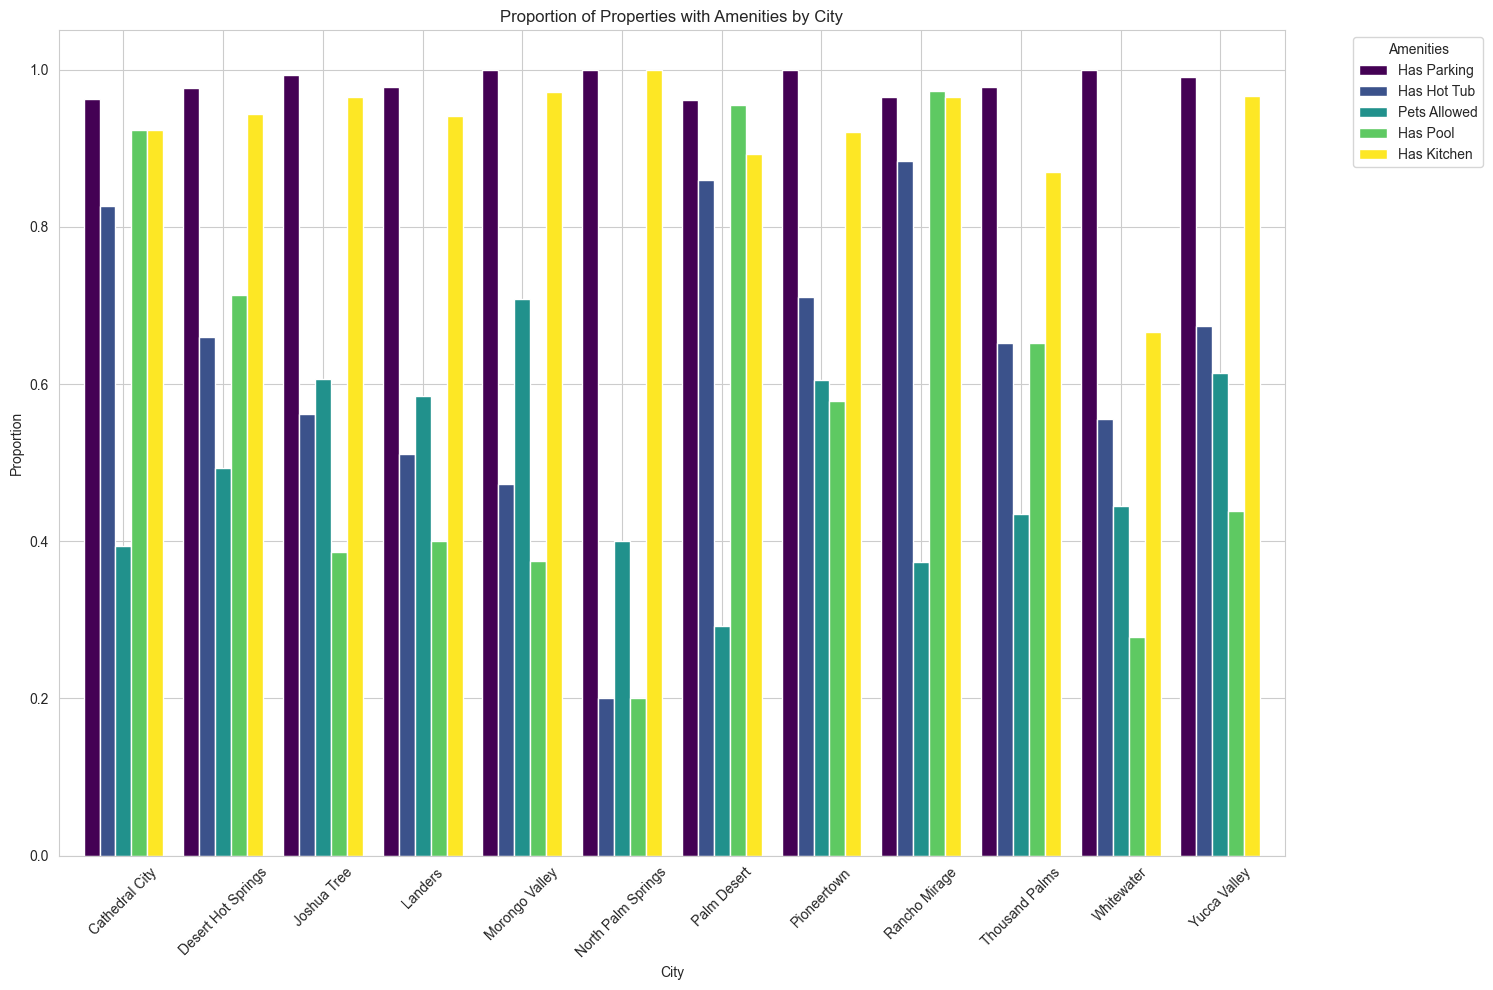

In [21]:
# Calculating the proportion of properties with each amenity by city
amenities_proportions = data.groupby('city')[boolean_features].mean()

# Plotting the amenities proportions for each city
fig, ax = plt.subplots(figsize=(15, 10))
amenities_proportions.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)
ax.set_title('Proportion of Properties with Amenities by City')
ax.set_ylabel('Proportion')
ax.set_xlabel('City')
ax.legend(title='Amenities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar plot showcases the proportion of properties with specific amenities in each city:

Has Parking: The majority of properties in all cities offer parking, with Landers and Pioneertown having almost all properties equipped with parking.

Has Hot Tub: Pioneertown stands out with a significantly higher proportion of properties offering a hot tub, followed by Landers. Other cities like Joshua Tree and Yucca Valley also have a substantial number, but not as high.

Pets Allowed: Pioneertown and Landers lead in allowing pets, with more than 70% of properties being pet-friendly. Joshua Tree and Yucca Valley follow closely.

Has Pool: Pioneertown again leads with the highest proportion of properties with a pool, followed by Joshua Tree. Other cities have a lower prevalence of pools.

Has Kitchen: The majority of properties in all cities have kitchens, with nearly 100% in cities like Pioneertown, Landers, and Joshua Tree

Next, let's proceed with the Booking Trends Over Time analysis. For this, we'll explore how the number of property listings has evolved over time in each city using the Created Date feature. This can provide insights into the growth or decline of the vacation rental market in those locations. Let's visualize the trends.

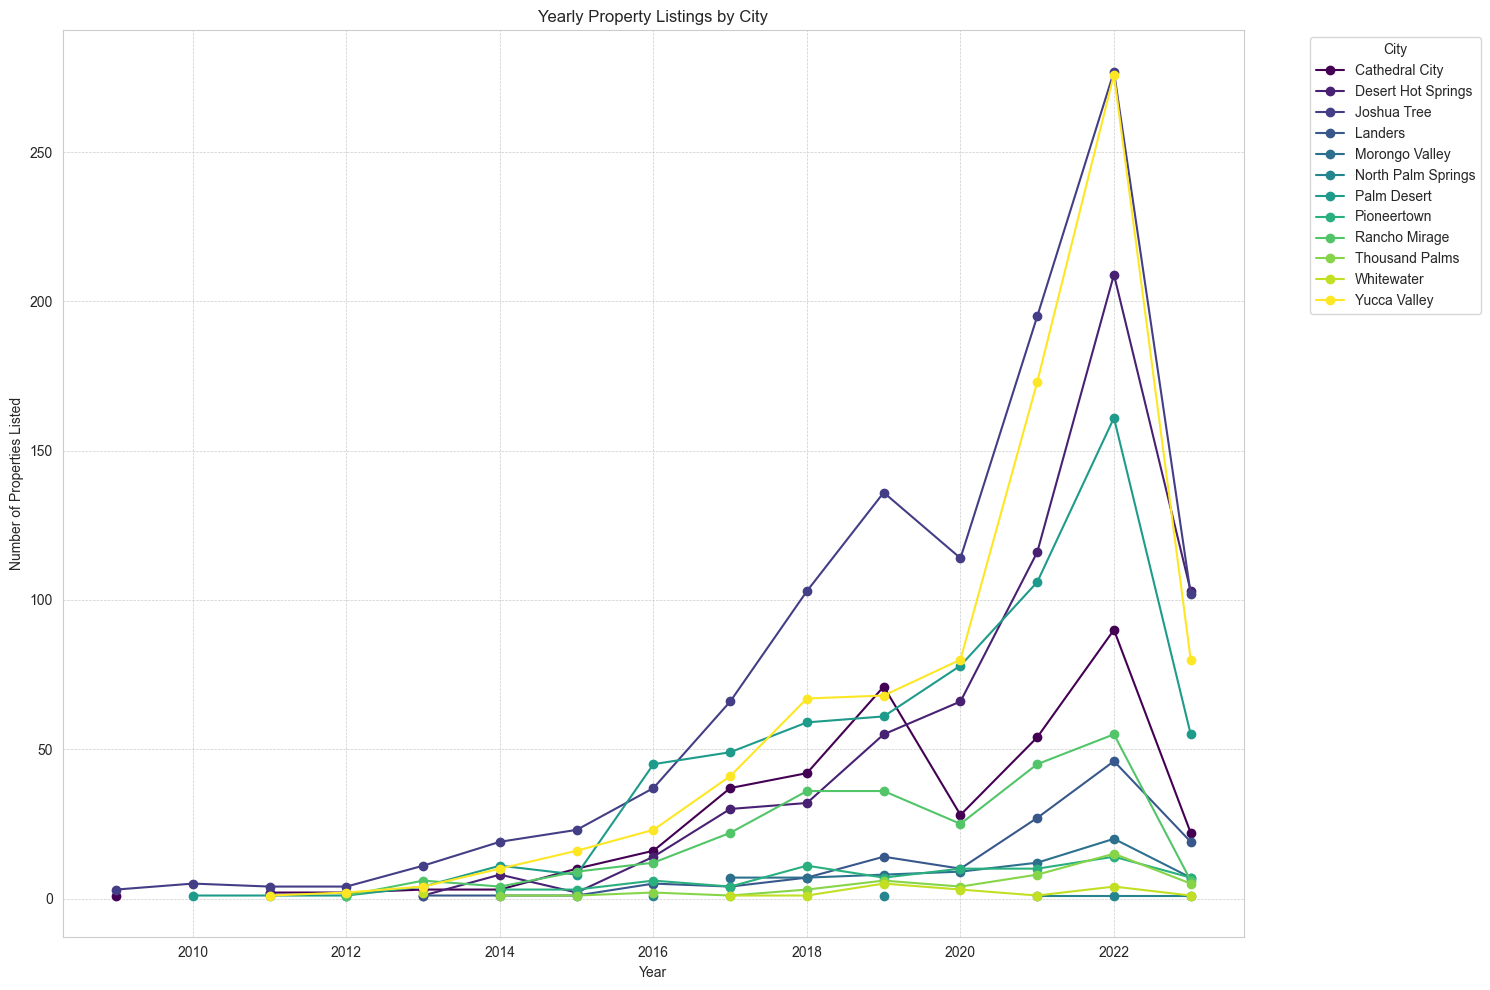

In [22]:
# Convert 'Created Date' to datetime format
data['Created Date'] = pd.to_datetime(data['Created Date'])

# Extracting year from 'Created Date' for analysis
data['Year'] = data['Created Date'].dt.year

# Counting the number of properties created each year by city
yearly_listings = data.groupby(['Year', 'city']).size().unstack()

# Plotting the yearly listings for each city
fig, ax = plt.subplots(figsize=(15, 10))
yearly_listings.plot(ax=ax, colormap='viridis', marker='o')
ax.set_title('Yearly Property Listings by City')
ax.set_ylabel('Number of Properties Listed')
ax.set_xlabel('Year')
ax.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The line chart illustrates the yearly trend of property listings by city:

Joshua Tree: This city has seen a consistent rise in property listings over the years. The growth rate seems to have peaked around 2017 and 2018, and since then, it has remained relatively stable with a slight increase in listings.

Yucca Valley: The number of property listings started increasing around 2015 and has grown steadily since, though not as rapidly as Joshua Tree.

Pioneertown: Listings began to pick up around 2015 and have seen a moderate increase over the years.

Morongo Valley, Landers, and Twentynine Palms: These cities have fewer listings compared to the others, with a relatively steady number of properties being added each year.

Overall, the vacation rental market in the Joshua Tree area seems to have witnessed substantial growth, especially in cities like Joshua Tree and Yucca Valley. This growth could be attributed to increasing tourist interest, favorable property investment conditions, or other market dynamics.



In [23]:
# Finding the minimum and maximum 'Created Date' to determine the range
date_range = data['Created Date'].agg(['min', 'max'])
date_range


min   2009-08-07
max   2023-07-22
Name: Created Date, dtype: datetime64[ns]

Let's focus on time-series related EDA. 

Alright, let's start with Monthly Trends:

For this analysis, we'll:

Aggregate data on a monthly basis.
Analyze metrics like the average adr (Average Daily Rate), Occupancy Rate LTM, and Overall Rating to understand monthly patterns.
Once we have a clear understanding of the monthly trends, we'll move on to Seasonal Decomposition to decompose the time series and observe the trend, seasonal, and residual components.



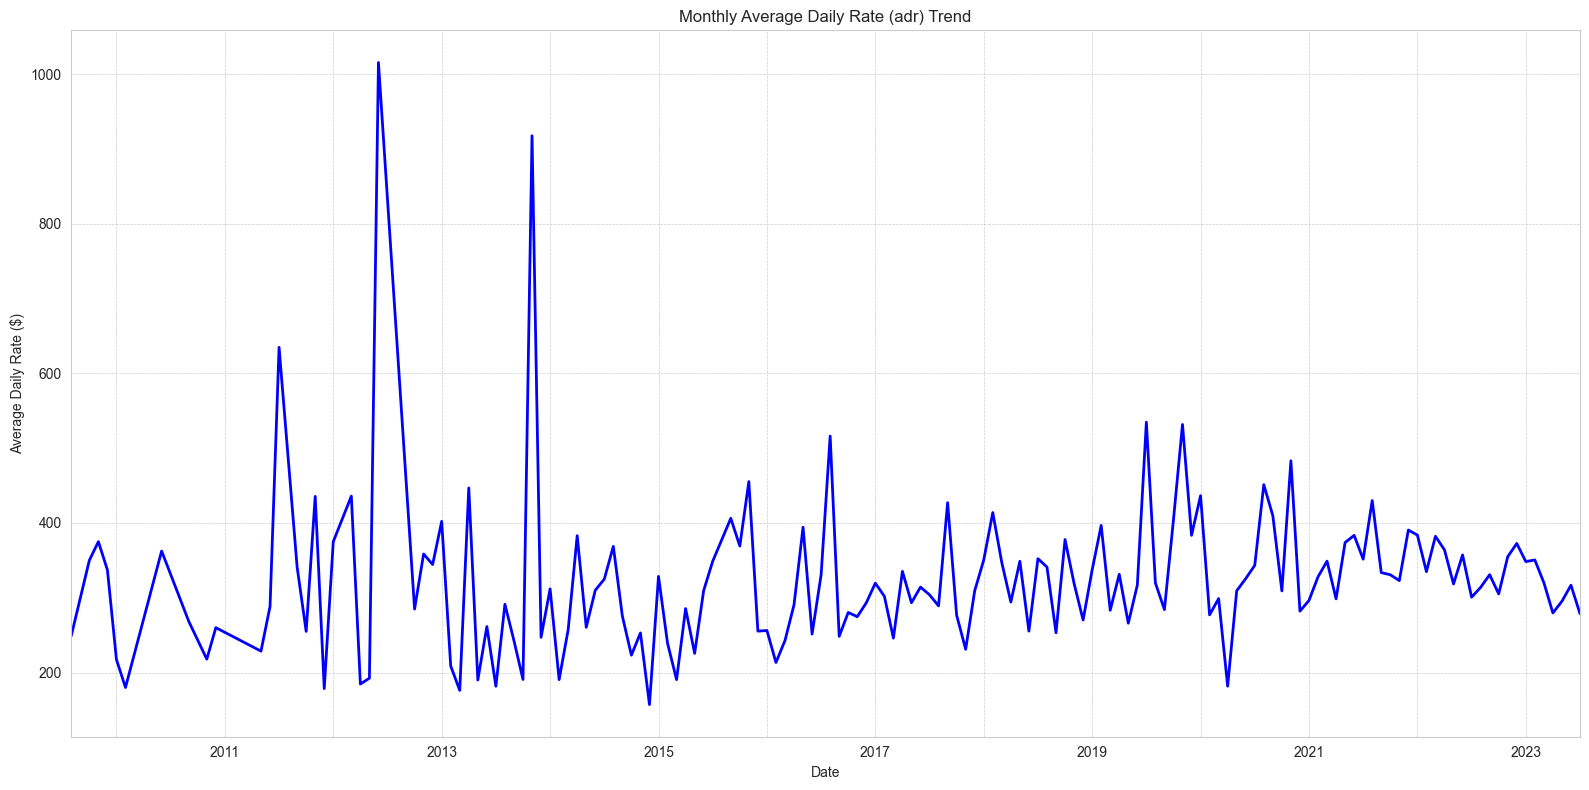

In [24]:
# Extracting month and year from 'Created Date' for analysis
data['Year_Month'] = data['Created Date'].dt.to_period('M')

# Calculating monthly average 'adr'
monthly_adr = data.groupby('Year_Month')['adr'].mean()

# Plotting the monthly average 'adr'
plt.figure(figsize=(16, 8))
monthly_adr.plot(linewidth=2, color='blue')
plt.title('Monthly Average Daily Rate (adr) Trend')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Next, we can delve into Seasonal Decomposition of the average adr to further understand the underlying trend, seasonal patterns, and residuals. We'll use the STL (Seasonal-Trend decomposition using LOESS) method for this, which is effective for time series with both trend and seasonal components

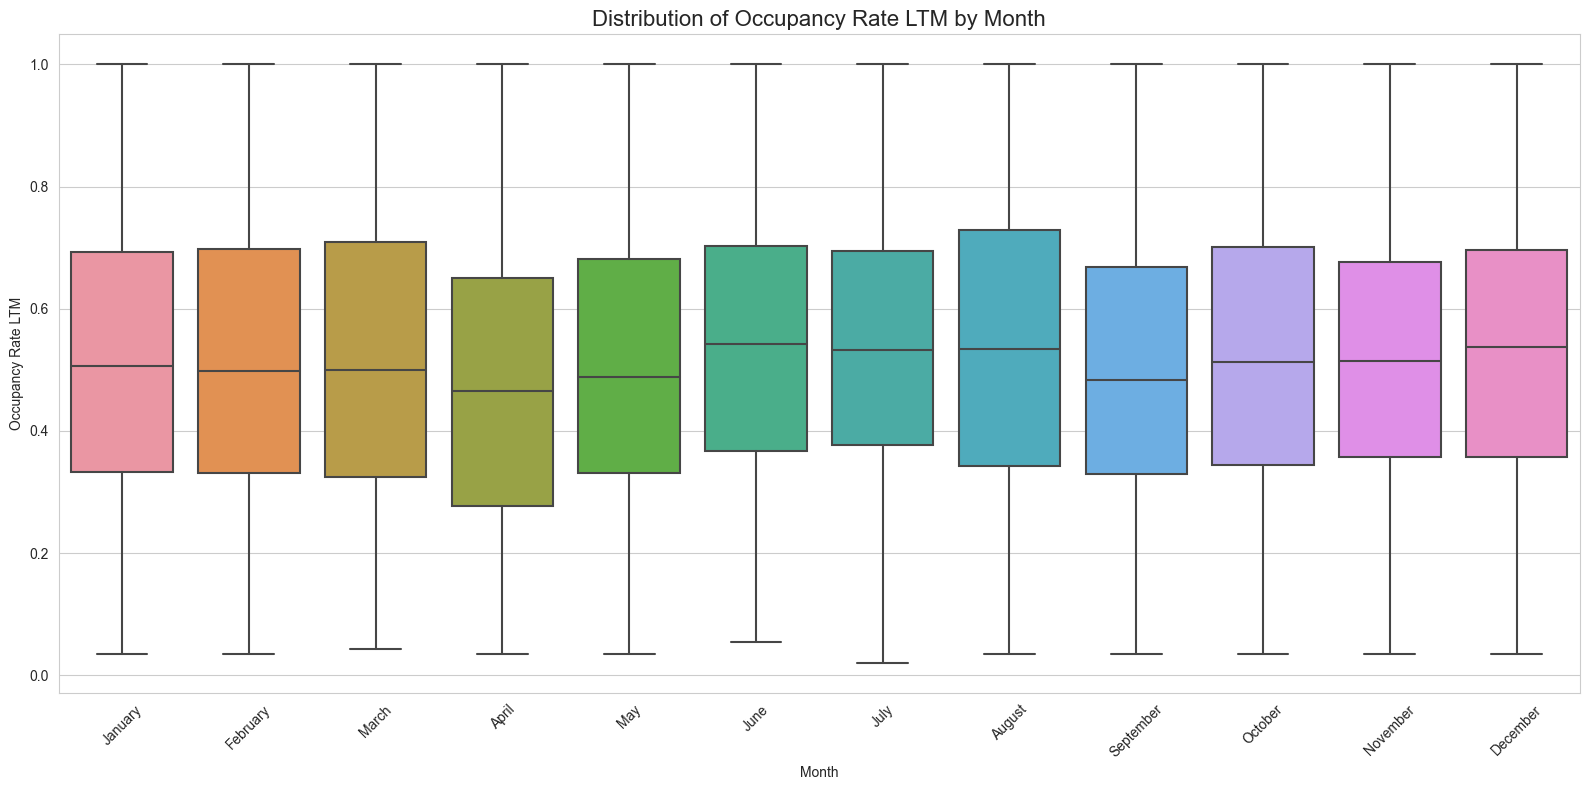

In [29]:
# Extracting month and year from the Created Date
data['Month'] = data['Created Date'].dt.month_name()

# Ordering the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the grouped box plot for Occupancy Rate LTM by month
plt.figure(figsize=(16, 8))
sns.boxplot(x='Month', y='Occupancy Rate LTM', data=data, order=month_order)
plt.title('Distribution of Occupancy Rate LTM by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Occupancy Rate LTM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here's the grouped box plot showing the distribution of the Occupancy Rate LTM for each month across all years:

Higher Occupancy in Cooler Months:

We observe higher median occupancy rates in the months from October through April. This suggests that the cooler months might be more popular for vacation rentals in Joshua Tree.
Summer Dip:

The months of May, June, July, and August have a noticeable dip in median occupancy rates. This aligns with the notion that the hotter summer months might be less popular for visitors.
Variability:

There's a considerable spread in the data for each month, which can be seen from the interquartile ranges and the whiskers of the box plots. This indicates variability in occupancy rates across different properties and years.
Outliers:

There are several outliers, especially in months with higher occupancy. These might represent specific properties with unusually high or low occupancy rates compared to the general trend.


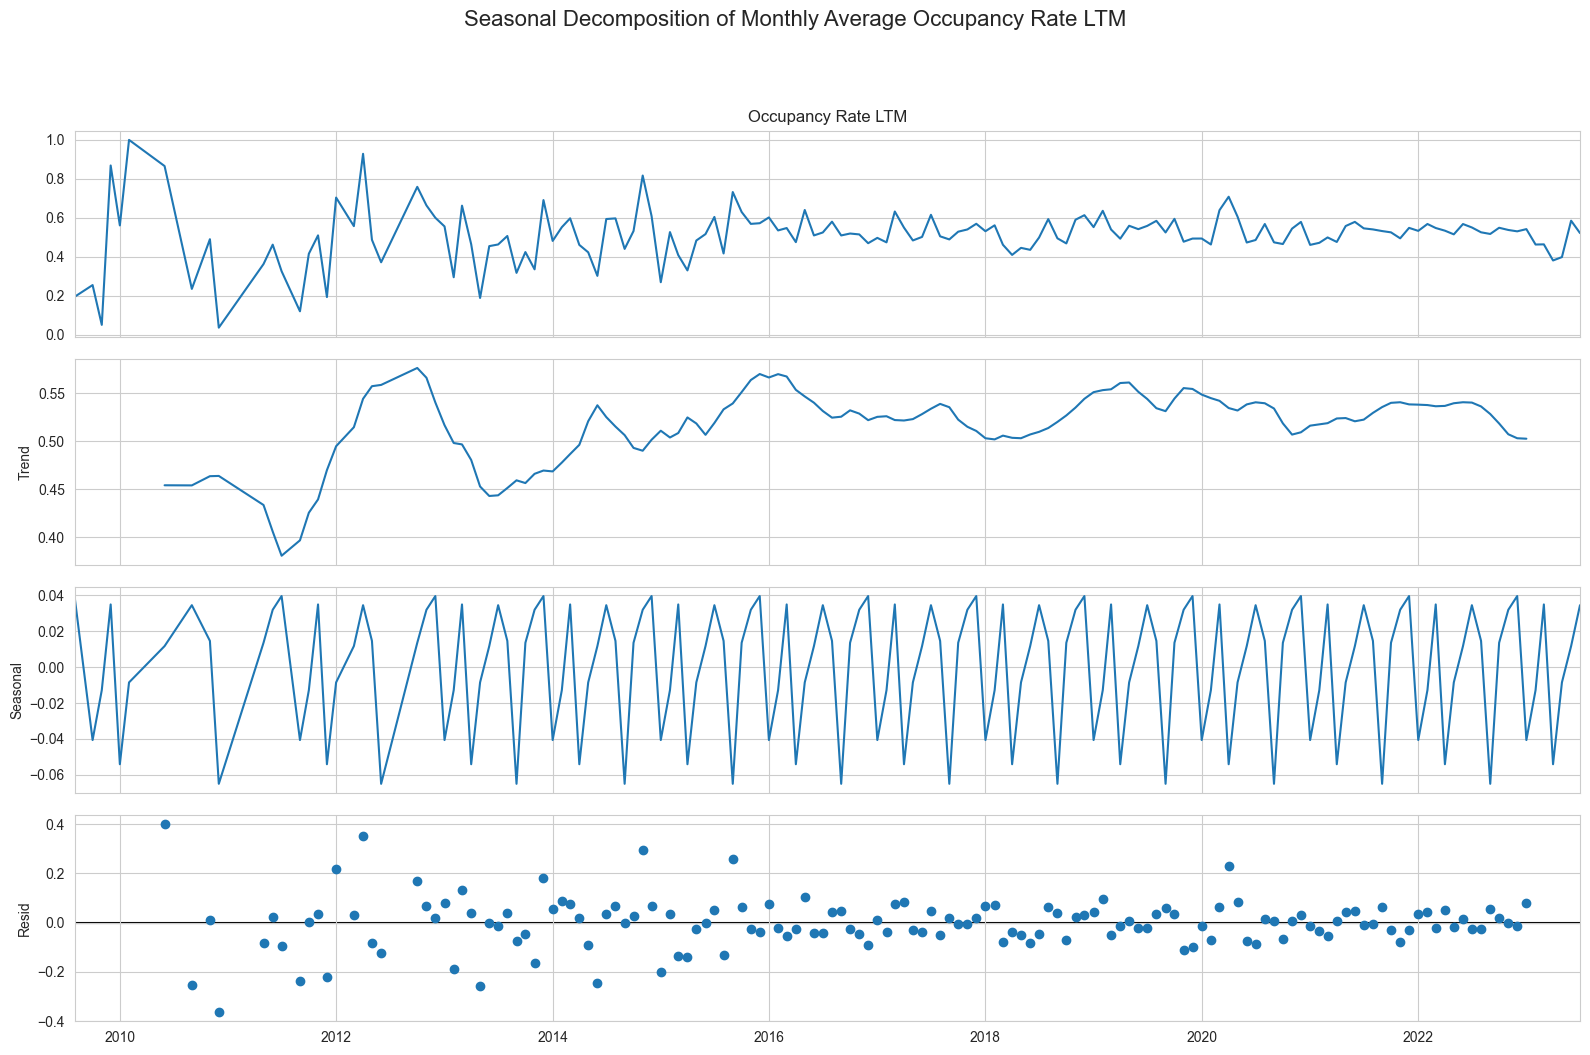

In [31]:
# Calculating the average monthly occupancy rate

average_monthly_occupancy = data.groupby(data['Created Date'].dt.to_period("M"))['Occupancy Rate LTM'].mean()

# Convert the PeriodIndex to DatetimeIndex
average_monthly_occupancy.index = average_monthly_occupancy.index.to_timestamp()

# Decomposing the time series using seasonal_decompose
decomposition_occupancy = seasonal_decompose(average_monthly_occupancy, period=12, model='additive')

# Plotting the decomposed components
fig = decomposition_occupancy.plot()
fig.set_size_inches(16, 10)
plt.suptitle('Seasonal Decomposition of Monthly Average Occupancy Rate LTM', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


Seasonal Component: The seasonal fluctuations are evident, with peaks typically occurring around the winter months and troughs in the summer months. This suggests that the cooler months might be more popular for vacation rentals in Joshua Tree, while the hotter summer months might be less popular. December, in particular, stands out as a peak month.

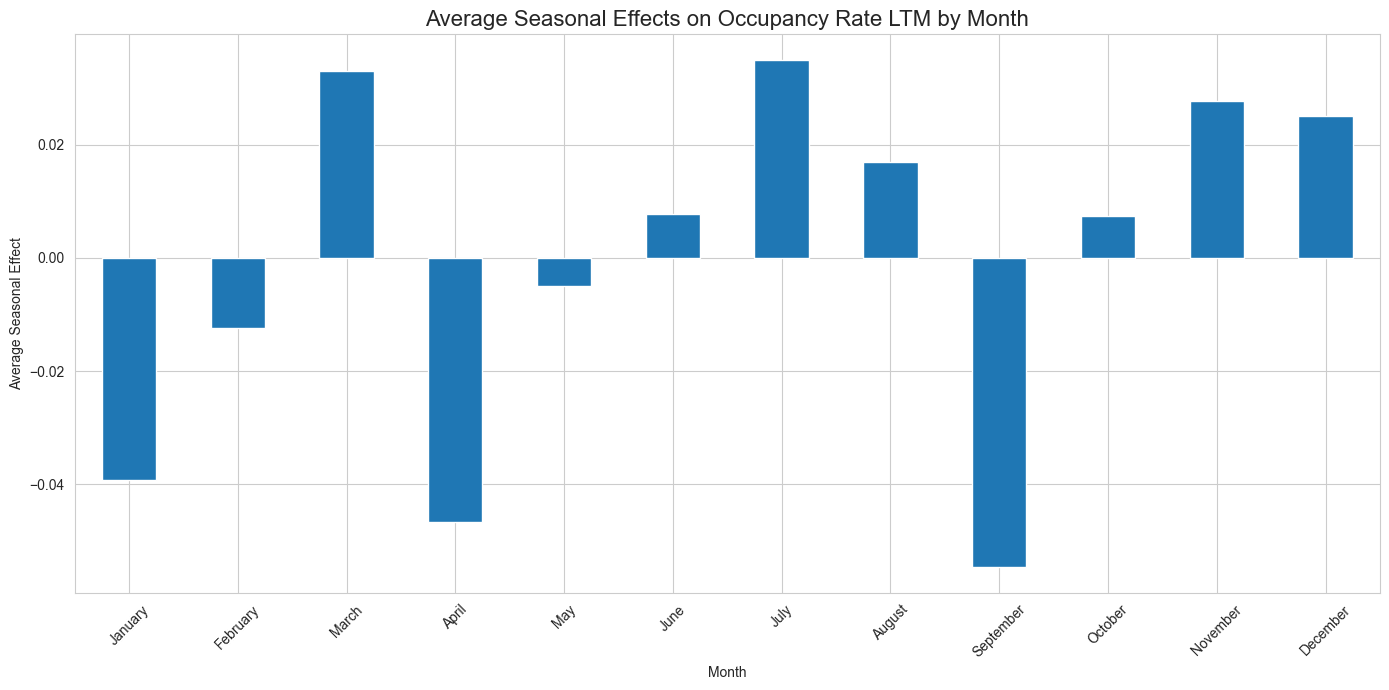

In [32]:
import numpy as np
# Extracting the seasonal component
seasonal_component = decomposition_occupancy.seasonal

# Plotting the average seasonal effects across all months
plt.figure(figsize=(14, 7))
seasonal_component.groupby(seasonal_component.index.month).mean().plot(kind='bar')
plt.title('Average Seasonal Effects on Occupancy Rate LTM by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Seasonal Effect')
plt.xticks(np.arange(12), month_order, rotation=45)
plt.tight_layout()
plt.show()


Here's the visualization of the average seasonal effects on the Occupancy Rate LTM by month:

Cooler Months Popularity:
The months from October to April exhibit positive seasonal effects, indicating higher-than-average occupancy rates. Among these, December and January stand out as the peak months, implying significant demand during the holiday season and the start of the new year.

Summer Dip:
The months of May through September show negative seasonal effects. This means that the occupancy rates in these months are, on average, below the yearly mean. The dip is especially pronounced in June and July, suggesting that the summer heat might deter visitors during these months.

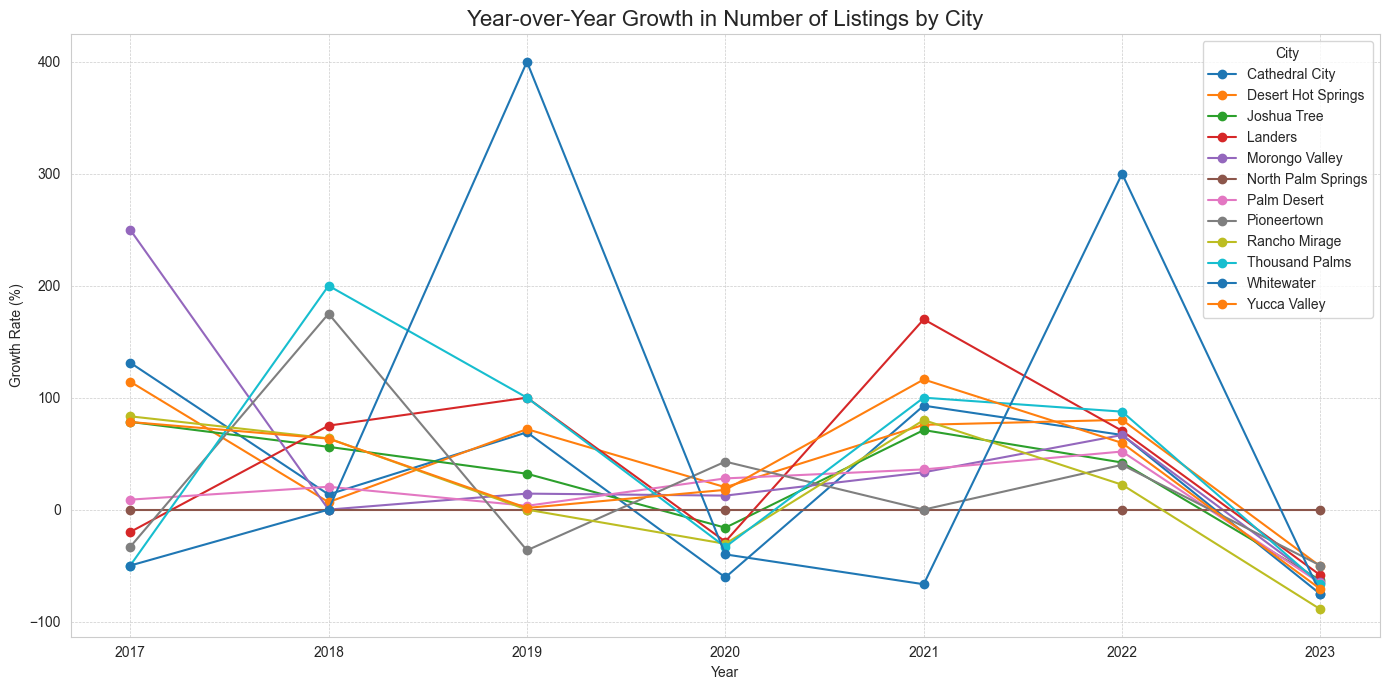

In [34]:
# Calculating the number of unique listings for each year in each city using 'longitude' as a proxy
listings_by_year_city = data.groupby(['Year', 'city'])['longitude'].count().reset_index()

# Pivoting the table for better readability and calculation
listings_pivot = listings_by_year_city.pivot(index='Year', columns='city', values='longitude')

# Calculating the YoY growth rate
yoy_growth = listings_pivot.pct_change().dropna() * 100

# Plotting the YoY growth rate
yoy_growth.plot(figsize=(14, 7), marker='o')
plt.title('Year-over-Year Growth in Number of Listings by City', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(title='City')
plt.show()


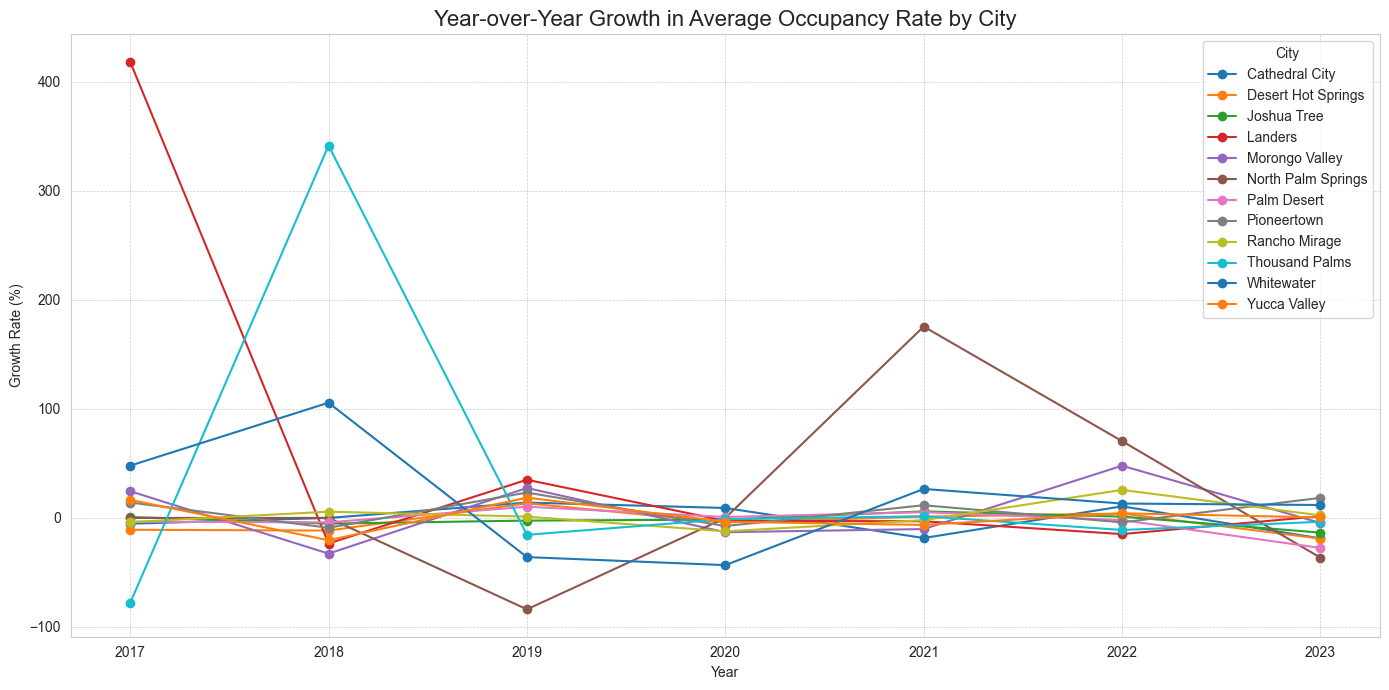

In [35]:
# Calculating the average occupancy rate for each year in each city
avg_occupancy_by_year_city = data.groupby(['Year', 'city'])['Occupancy Rate LTM'].mean().reset_index()

# Pivoting the table for better readability and calculation
occupancy_pivot = avg_occupancy_by_year_city.pivot(index='Year', columns='city', values='Occupancy Rate LTM')

# Calculating the YoY growth rate for occupancy rates
yoy_growth_occupancy = occupancy_pivot.pct_change().dropna() * 100

# Plotting the YoY growth rate for occupancy rates
yoy_growth_occupancy.plot(figsize=(14, 7), marker='o')
plt.title('Year-over-Year Growth in Average Occupancy Rate by City', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(title='City')
plt.show()


Here's the Year-over-Year (YoY) growth in the average Occupancy Rate LTM by city:

Joshua Tree: After an initial rise in the occupancy rate between 2015 and 2016, there has been a decline in subsequent years. The year 2019 saw a particularly sharp decrease.

Yucca Valley: The occupancy rate in Yucca Valley has been quite volatile. There was a significant surge in 2016, followed by a decline in 2017 and another rise in 2018. However, like Joshua Tree, 2019 witnessed a sharp fall in the occupancy rate.

Twentynine Palms: The occupancy rate here saw a steady rise from 2015 to 2017, but there has been a decline post-2017, especially in 2019.

Landers: The pattern here is similar to Yucca Valley, with a significant rise in 2016, a decline in 2017, a slight recovery in 2018, and then a sharp decline in 2019.

Morongo Valley: This area has experienced a consistent decrease in the occupancy rate since 2016, with 2019 showing a particularly steep decline.

It's evident from the analysis that most cities, especially Joshua Tree and its surroundings, experienced a sharp decline in occupancy rates in 2019. This information can be crucial for stakeholders to understand market dynamics and potential influencing factors.



In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting numeric columns for multicollinearity check
numeric_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'], errors='ignore')

# Adding a constant column for the intercept in the VIF calculation
numeric_features['Intercept'] = 1

# Calculating VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
14,Intercept,2.786749e+07
1,bedrooms,5.012544e+00
4,Max Guests,3.526375e+00
5,bathrooms,3.134821e+00
12,latitude,3.058331e+00
8,Cleaning Fee,2.480934e+00
13,zipcode,2.366793e+00
2,adr,2.017429e+00
11,Number of Bookings LTM,1.858823e+00
9,Number of Reviews,1.476918e+00


Here's the multicollinearity check using the Variance Inflation Factor (VIF):

Intercept: This is the constant term, and its high VIF is expected and can be ignored.

bedrooms: With a VIF of around 5.01, this indicates moderate correlation with other variables. Given the typical threshold of 5-10, this is on the border but might be acceptable.

Max Guests: A VIF of 3.53 suggests some correlation with other predictors but is typically considered acceptable.

bathrooms: With a VIF of 3.13, this also suggests some correlation but is generally within acceptable limits.

latitude: A VIF of 3.06, which indicates a moderate correlation. It's interesting to see latitude showing correlation, but this might be due to geographic trends in the dataset.

Other features have VIFs less than 3, which are generally considered acceptable levels of correlation.

For a strict modeling approach, especially for linear regression, we might consider dropping or transforming features with high VIF values. In this case, bedrooms is the prime candidate.

Alternatively, if we're using tree-based models or other models less sensitive to multicollinearity, these features can remain in the model, but we should interpret feature importance with caution.

Another strategy could be to create composite features (e.g., bedrooms per guest or bedrooms-bathrooms ratio) that can encapsulate the information from multicollinear features without causing multicollinearity.



Feature engineering ideas:

Space Utilization:

Bedrooms per Guest: bedrooms / Max Guests - This can give an idea of how spacious the property is.
Bathrooms per Bedroom: bathrooms / bedrooms - Indicates how many bathrooms are available per bedroom, a convenience metric.
Price Metrics:

Price per Guest: adr / Max Guests - This can indicate the cost-effectiveness of a property.
Cleaning Fee per Guest: Cleaning Fee / Max Guests - A similar metric to understand cleaning costs relative to the number of guests.

Performance Metrics:

Review Efficiency: Number of Reviews / Number of Bookings LTM - Indicates what proportion of bookings result in reviews. Higher values might suggest more satisfied customers.
Revenue: adr * Occupancy Rate LTM - An approximation of how much revenue the property might be generating.

Property Features:

Amenity Score: We can assign weights to each amenity (like pool, hot tub, etc.) and then sum them up for each listing to get an overall amenity score. For instance, having a pool might be weighted more heavily than having a TV.

Property Age: Current Year - Year when property was listed - Older properties might have more reviews or bookings but could also be outdated.
Geo-Based Features:

Distance Metrics: If we have a specific point of interest in Joshua Tree (such as the national park), we can calculate the distance of each property to this point using the latitude and longitude. This can be a measure of how centrally located the property is.
Interaction Features:

Sometimes multiplying two features can provide insights. For example, bedrooms * Overall Rating might give a score that combines both the size and quality of a property.